In [1]:
if abspath(PROGRAM_FILE) == abspath(@__FILE__)
    # This condition is true if the script is run directly
    # (less common in notebooks, but good practice for standalone scripts)
    project_root = dirname(Pkg.project().path)
    cd(project_root)
elseif !isnothing(PROGRAM_FILE) && occursin("jupyter", lowercase(PROGRAM_FILE))
    # This condition is likely true when running in a Jupyter environment
    notebook_dir = dirname(@__FILE__)
    cd(notebook_dir)
else
    @info "Not running as a standalone script or in Jupyter, current working directory might be different."
end

println("Current working directory: ", pwd())

using Pkg
Pkg.activate("..")

┌ Info: Not running as a standalone script or in Jupyter, current working directory might be different.
└ @ Main /home/fedflorio/PhD/MatrixProductBP.jl/results/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W0sdnNjb2RlLXJlbW90ZQ==.jl:11


Current working directory: /home/fedflorio/PhD/MatrixProductBP.jl/results


  Activating project at `~/PhD/MatrixProductBP.jl`


In [2]:
using JLD2, Plots, Statistics, LaTeXStrings
blue = palette(:tab10)[1]
orange = palette(:tab10)[2]
green = palette(:tab10)[3]
red = palette(:tab10)[4]
;

## Infinite regular

In [3]:
D = load("./infinite_regular_k8_beta0,5_J1_h0.jld2")
m = D["m"]
m_fourier = D["m_fourier"]
m_mc = D["m_mc"]
σ_mc = D["σ_mc"]
;

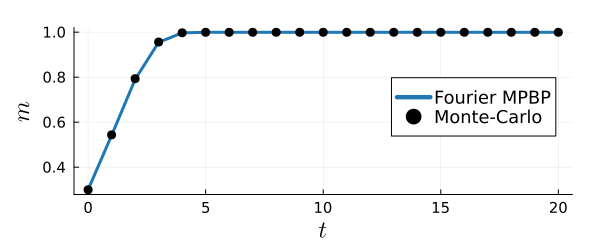

┌ Warning: Keyword argument markerstrokestyle not supported with Plots.GRBackend().  Choose from: annotationcolor, annotationfontfamily, annotationfontsize, annotationhalign, annotationrotation, annotations, annotationvalign, arrow, aspect_ratio, axis, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, colorbar_titlefont, colorbar_titlefontcolor, colorbar_titlefontrotation, colorbar_titlefontsize, connections, contour_labels, discrete_values, fill, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, fontfamily, fontfamily_subplot, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, formatter, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefont, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotat

In [4]:
y_mc = m_mc
y = m
y_fourier = real.(m_fourier)

T = length(y) - 1
plrr = plot(xlabel=L"t", ylabel=L"m", legend=:right, margin=5Plots.mm,
            xlabelfontsize=16,
            ylabelfontsize=16,
            legendfontsize=12,
            tickfontsize=10,
            size=(600,250))

plot!(plrr, 0:T, y_fourier[1:end], color=blue, lw=3, label="Fourier MPBP")
# plot!(plrr, 0:2:T, y[1:2:end], color=orange, label="MPBP")
plot!(plrr, 0:T, y_mc[1:end], c=:black, st=:scatter, marker=:dot, markersize=5, label="Monte-Carlo")
display(plrr)

In [5]:
# savefig(plrr, "./figures/infinite_regular_k8_beta0,5_J1_h0.svg")

## Erdös-Renyi with uniform and positive $J$

In [6]:
D = load("./comparison_beta0,3_J1_h0,2_er30_bis.jld2")
m = D["m"]
m_fourier = D["m_fourier"]
m_mc = D["m_mc"]
σ_mc = D["σ_mc"];

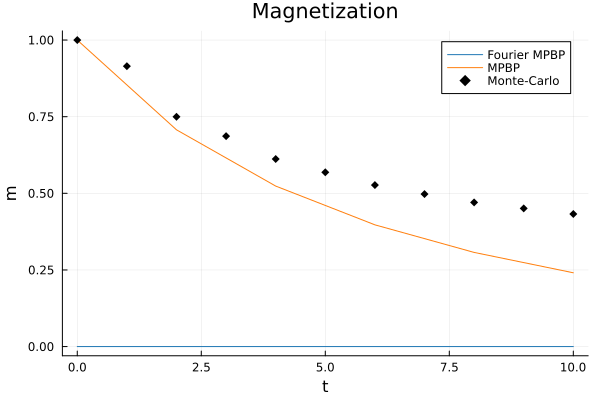

In [7]:
i = 13
y_mc = m_mc[i]
y = m[i]
y_fourier = m_fourier[i]

T = length(y) - 1
pler = plot(xlabel="t", ylabel="m", title="Magnetization", legend=:topright)
plot!(pler, 0:T, y_fourier[1:end], color=blue, label="Fourier MPBP")
plot!(pler, 0:2:T, y[1:2:end], color=orange, label="MPBP")
plot!(pler, 0:T, y_mc[1:end], c=:black, st=:scatter, marker=:diamond, markersize=4, label="Monte-Carlo")
display(pler)

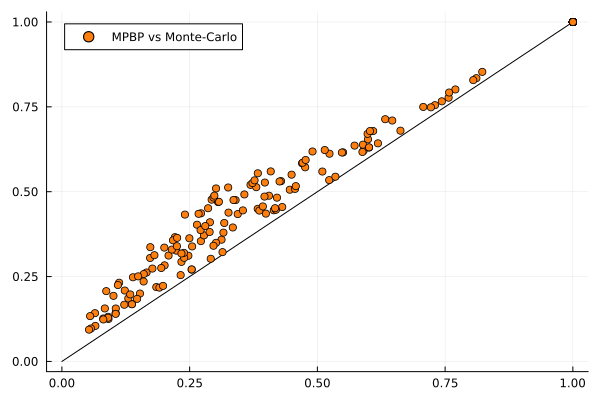

In [8]:
y_sc = reduce(vcat, y[1:2:end] for y in m)
y_fourier_sc = reduce(vcat, y[1:2:end] for y in m_fourier)
y_mc_sc = reduce(vcat, y[1:2:end] for y in m_mc)
pl2er = plot()
plot!(pl2er, 0:0.1:1, 0:0.1:1, c=:black, label="")
plot!(pl2er, y_sc, y_mc_sc, st=:scatter, color=orange, markerstrokecolor=:black, label="MPBP vs Monte-Carlo")

## Random tree with uniform and positive $J$

In [31]:
D = load("./comparison_beta0,7_J1_h0,2_rt5.jld2")
m = D["m"]
m_fourier = D["m_fourier"]
m_mc = D["m_mc"]
σ_mc = D["σ_mc"];

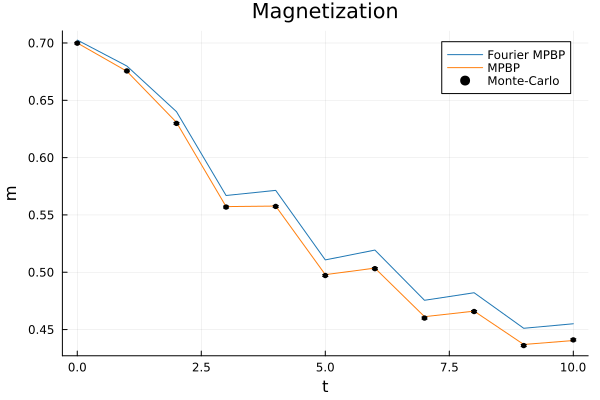

In [33]:
i = 1
y_mc = m_mc[i]
y = m[i]
y_fourier = m_fourier[i]

T = length(y) - 1
pler = plot(xlabel="t", ylabel="m", title="Magnetization", legend=:topright)
plot!(pler, 0:T, y_fourier[1:end], color=blue, label="Fourier MPBP")
plot!(pler, 0:T, y[1:end], color=orange, label="MPBP")
plot!(pler, 0:T, y_mc[1:end], yerr=σ_mc[i], c=:black, st=:scatter, marker=:dot, markersize=3, label="Monte-Carlo")
display(pler)

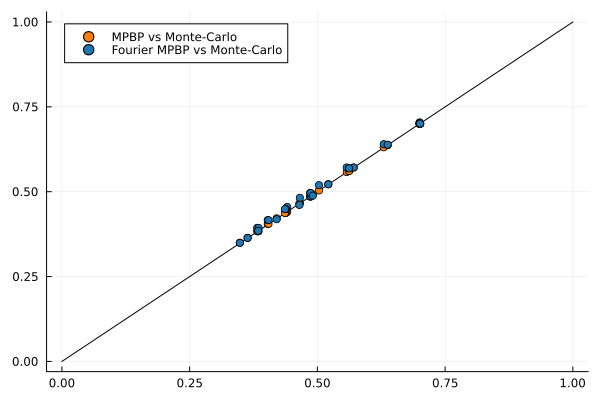

In [34]:
y_sc = reduce(vcat, y[1:2:end] for y in m)
y_fourier_sc = reduce(vcat, y[1:2:end] for y in m_fourier)
y_mc_sc = reduce(vcat, y[1:2:end] for y in m_mc)
pl2er = plot()
plot!(pl2er, 0:0.1:1, 0:0.1:1, c=:black, label="")
plot!(pl2er, y_mc_sc, y_sc, st=:scatter, color=orange, markerstrokecolor=:black, label="MPBP vs Monte-Carlo")
plot!(pl2er, y_mc_sc, y_fourier_sc, color=blue, st=:scatter, label="Fourier MPBP vs Monte-Carlo")

## Erdös-Renyi with Random couplings

In [12]:
D = load("./random_coupling_er10.jld2")
m_fourier = D["m_fourier"]
m_mc = D["m_mc"]
σ_mc = D["σ_mc"]
;

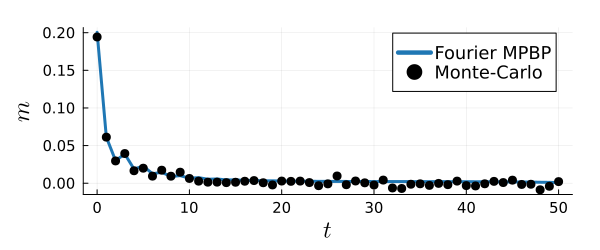

In [19]:
i = 3
y_mc = m_mc[i]
y_fourier = m_fourier[i]

T = length(y_fourier) - 1
plrand = plot(xlabel=L"t", ylabel=L"m", legend=:topright, margin=5Plots.mm,
            xlabelfontsize=16,
            ylabelfontsize=16,
            legendfontsize=12,
            tickfontsize=10,
            size=(600,250))

plot!(plrand, 0:T, y_fourier[1:end], color=blue, lw=3, label="Fourier MPBP")
plot!(plrand, 0:T, y_mc[1:end], c=:black, st=:scatter, marker=:dot, markersize=5, label="Monte-Carlo")

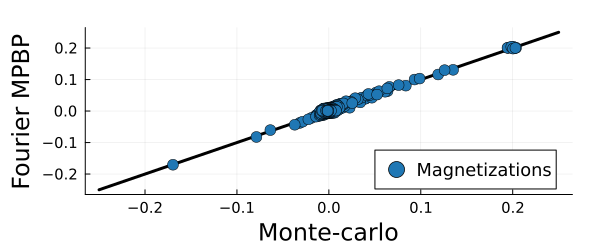

In [14]:
y_fourier_sc = reduce(vcat, y for y in m_fourier)
y_mc_sc = reduce(vcat, y for y in m_mc)
pl2rand = plot(xlabel="Monte-carlo", ylabel="Fourier MPBP", legend=:bottomright, margin=5Plots.mm,
            xlabelfontsize=16,
            ylabelfontsize=16,
            legendfontsize=12,
            tickfontsize=10,
            size=(600,250))

plot!(pl2rand, -0.25:0.1:0.25, -0.25:0.1:0.25, label="", c=:black, lw=3)
plot!(pl2rand, y_mc_sc, y_fourier_sc, st=:scatter, markersize=6, color=blue, markerstrokecolor=:black, label="Magnetizations")

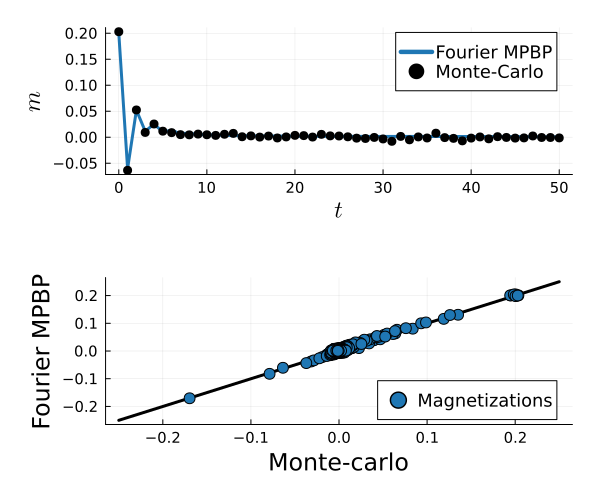

In [15]:
plrand_comb = plot(plrand, pl2rand, size=(600, 500), margin=5Plots.mm, layout=(2,1))

In [16]:
# savefig(plrand, "./figures/random_coupling_er10_node.svg")
# savefig(pl2rand, "./figures/random_coupling_er10_scatter.svg")
# savefig(plrand_comb, "./figures/random_coupling_er10.svg")